## check PI control

In [1]:
%reset
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import scendict as sc
import utils as ut
import netCDF4 as nc
import xarray as xr
import numpy as np
from importlib import reload
reload(sc)
reload(ut)

import cartopy as cp
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import glob
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}

import time 
import pickle


import weighted
from matplotlib.cbook import violin_stats
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
tauy_1d_2259_daily.nc

NameError: name 'tauy_1d_2259_daily' is not defined

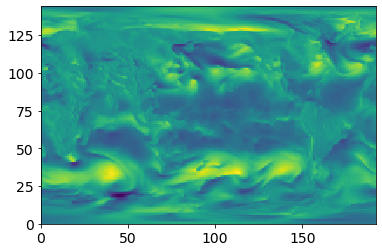

In [4]:
tnc = xr.open_dataset('/gpfs/home/mep22dku/scratch/u-aw310_pictrl/aw310_wind_y2287m03.nc')
plt.pcolormesh(tnc['uwind10m'][0,:,:])

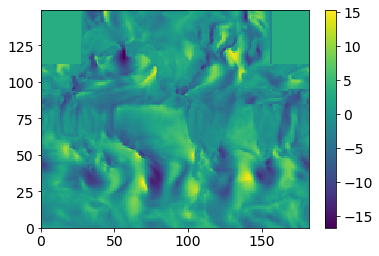

In [12]:
tnc = xr.open_dataset('/gpfs/home/mep22dku/scratch/u-aw310_pictrl/tauy_1d_2280_daily.nc', decode_times=False)

w = plt.pcolormesh(tnc['vflx'][0,:,:])
plt.colorbar(w)

<xarray.Dataset>
Dimensions:    (mon: 15, x: 182, y: 149, yr: 80)
Coordinates:
  * yr         (yr) int64 2220 2221 2222 2223 2224 ... 2295 2296 2297 2298 2299
  * mon        (mon) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * x          (x) int64 0 1 2 3 4 5 6 7 8 ... 174 175 176 177 178 179 180 181
  * y          (y) int64 0 1 2 3 4 5 6 7 8 ... 141 142 143 144 145 146 147 148
Data variables:
    mean_wspd  (yr, mon, y, x) float64 ...
Attributes:
    desc:     mean monthly maps of wspd, made from ~/scratch/MET_forcing/
    desc2:    summer is month 13, winter is month 14, full year is month 15 (...
<xarray.DataArray 'mean_wspd' (y: 10, x: 10)>
array([[0.544619, 0.04297 , 0.938625, 0.961898, 0.507097, 0.947589, 0.490672,
        0.607405, 0.715111, 0.902386],
       [0.465952, 0.242053, 0.961759, 0.072927, 0.289327, 0.413119, 0.321067,
        0.805969, 0.037663, 0.290933],
       [0.103509, 0.453331, 0.552995, 0.344078, 0.692212, 0.815947, 0.793018,
        0.923147, 0.707123, 0.711704

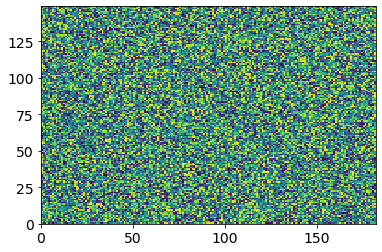

In [21]:
w = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_PI_monthly_wspd.nc')
print(w)
plt.pcolormesh(w['mean_wspd'][0,0,:,:])

print(w['mean_wspd'][10,0,40:50,40:50])

/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_PI_monthly_wspd.nc
2220
31.927507
0.001422261
(31, 149, 182)
13.192887
0.37112254
w
(28, 149, 182)
13.425305
0.32733265
w
(31, 149, 182)
13.197511
0.3157704
w
(30, 149, 182)
13.914448
0.33283004
w
(31, 149, 182)
14.259655
0.3775194
w
(30, 149, 182)
14.233969
0.3520488
w
(31, 149, 182)
16.092976
0.4217523
w
(31, 149, 182)
15.689784
0.3567137
w
(30, 149, 182)
14.272294
0.34795952
w
(31, 149, 182)
12.623898
0.37518343
w
(30, 149, 182)
12.67541
0.290009
w
(31, 149, 182)
12.130294
0.23087722
w
2220
30.899588
0.0019322202
(31, 149, 182)
12.526454
0.29775184
w
(28, 149, 182)
12.5491495
0.43874767
w
(31, 149, 182)
13.77799
0.35711968
w
(30, 149, 182)
13.049634
0.32281062
w
(31, 149, 182)
15.367122
0.31512353
w
(30, 149, 182)
14.374174
0.3706605
w
(31, 149, 182)
14.569158
0.3518997
w
(31, 149, 182)
14.213672
0.34076062
w
(30, 149, 182)
14.344457
0.33574247
w
(31, 149, 182)
13.962202
0.333878
w
(30, 149, 182)
12.656054
0.31853858
w


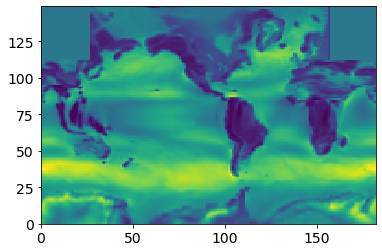

In [34]:
starts = np.array([0, 31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334])
ends = np.array([31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334, 365])

ncnam = f'/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_PI_monthly_wspd.nc'
#ncnam = 'cunt.nc'
print(ncnam)
for yr in range(2220,2300):
    rdir = '/gpfs/home/mep22dku/scratch/u-aw310_pictrl'
    t_stor = np.random.rand(80,15,149,182)
    if yr%10 == 0:
        print(yr)
    try:
        tw = nc.Dataset(f'{rdir}/tauy_1d_{yr}_daily.nc') 
        #print(tw)
        t_nc1 = tw['vflx'][:]
        tw = nc.Dataset(f'{rdir}/taux_1d_{yr}_daily.nc') 
        #print(tw)
        t_nc2 = tw['uflx'][:]
        t_nc = np.sqrt(t_nc1**2+t_nc2**2)
        print(np.nanmax(t_nc))
        print(np.nanmin(t_nc))
        for i in range(0,12):
            t_mon = t_nc[starts[i]:ends[i],:,:]
            print(np.shape(t_mon))
            t_avg = np.nanmean(t_mon, axis = 0)
            print(np.nanmax(t_avg))
            print(np.nanmin(t_avg))
            t_stor[yr-2220,i,:,:] = t_avg
            # plt.pcolormesh(t_avg)
            # plt.show()
            print('w')
        summer = np.concatenate((t_nc[0:59,:,:],t_nc[334:365,:,:]),axis = 0)
        t_stor[yr-2220,12,:,:] = np.nanmean(summer,axis =0)
        winter = (t_nc[151:243,:,:])
        t_stor[yr-2220,13,:,:] = np.nanmean(winter,axis = 0)
        t_stor[yr-2220,14,:,:] = np.nanmean(t_nc,axis = 0)
        
        plt.pcolormesh(t_stor[yr-2220,14,:,:])
    except:
        print(f'cannot find {yr}')
        t_stor[yr-1940,:,:,:] = np.nan

ds = xr.Dataset(
 {"mean_wspd": (("yr", "mon", "y", "x" ), t_stor)},
    coords={
        "yr": np.arange(2220,2300,1),
        "mon": np.arange(1,16,1),
        "x": np.arange(0,182,1),
        "y": np.arange(0,149,1),
    },
    attrs={
        "desc": "mean monthly maps of wspd, made from ~/scratch/MET_forcing/",
        "desc2": "summer is month 13, winter is month 14, full year is month 15 (index 14)"
  },
   )

ds.to_netcdf(ncnam)

PI_scen_I_have_lost_it.nc
2220
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299


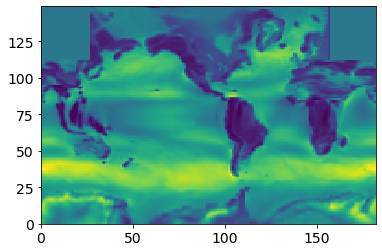

In [54]:
starts = np.array([0, 31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334])
ends = np.array([31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334, 365])

ncnam = f'/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_PI_monthly_wspd.nc'
ncnam = 'PI_scen_I_have_lost_it.nc'
print(ncnam)
t_stor = np.random.rand(80,15,149,182)
for yr in range(2220,2300):
    rdir = '/gpfs/home/mep22dku/scratch/u-aw310_pictrl'
    if yr%10 == 0:
        print(yr)
    try:
        tw = nc.Dataset(f'{rdir}/tauy_1d_{yr}_daily.nc') 
        #print(tw)
        t_nc1 = tw['vflx'][:]
        tw = nc.Dataset(f'{rdir}/taux_1d_{yr}_daily.nc') 
        #print(tw)
        t_nc2 = tw['uflx'][:]
        t_nc = np.sqrt(t_nc1**2+t_nc2**2)
        for i in range(0,12):
            t_mon = t_nc[starts[i]:ends[i],:,:]

            t_avg = np.nanmean(t_mon, axis = 0)

            t_stor[yr-2220,i,:,:] = t_avg

        summer = np.concatenate((t_nc[0:59,:,:],t_nc[334:365,:,:]),axis = 0)
        t_stor[yr-2220,12,:,:] = np.nanmean(summer,axis =0)
        winter = (t_nc[151:243,:,:])
        t_stor[yr-2220,13,:,:] = np.nanmean(winter,axis = 0)
        t_stor[yr-2220,14,:,:] = np.nanmean(t_nc,axis = 0)       
        plt.pcolormesh(t_stor[yr-2220,14,:,:])
        print(yr)
    except:
        print(f'cannot find {yr}')
        t_stor[yr-1940,:,:,:] = np.nan

ds = xr.Dataset(
 {"mean_wspd": (("yr", "mon", "y", "x" ), t_stor)},
    coords={
        "yr": np.arange(2220,2300,1),
        "mon": np.arange(1,16,1),
        "x": np.arange(0,182,1),
        "y": np.arange(0,149,1),
    },
    attrs={
        "desc": "mean monthly maps of wspd, made from ~/scratch/MET_forcing/",
        "desc2": "summer is month 13, winter is month 14, full year is month 15 (index 14)"
  },
   )

ds.to_netcdf(ncnam)

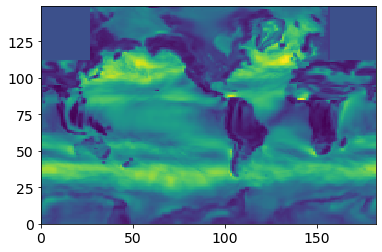

In [49]:
plt.pcolormesh(t_stor[0,0,:,:])
ncnam = 'PI_scen_I_have_lost_it.nc'
ds = xr.Dataset(
 {"mean_wspd": (("yr", "mon", "y", "x" ), t_stor)},
    coords={
        "yr": np.arange(2220,2300,1),
        "mon": np.arange(1,16,1),
        "x": np.arange(0,182,1),
        "y": np.arange(0,149,1),
    },
    attrs={
        "desc": "mean monthly maps of wspd, made from ~/scratch/MET_forcing/",
        "desc2": "summer is month 13, winter is month 14, full year is month 15 (index 14)"
  },
   )

ds.to_netcdf(ncnam)

In [48]:
print(ncnam)

/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_PI_monthly_wspd.nc


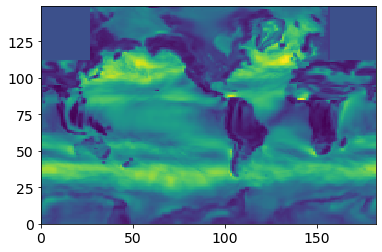

In [58]:
w = xr.open_dataset(f'PI_scen_I_have_lost_it.nc')


plt.pcolormesh(w['mean_wspd'][0,0,:,:])

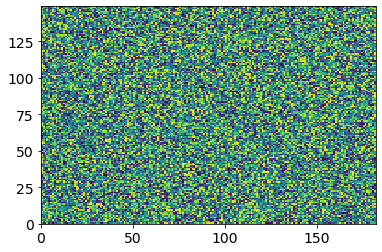

In [59]:
w = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_PI_monthly_wspd.nc')

plt.pcolormesh(w['mean_wspd'][0,0,:,:])